In [84]:
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTENC
from imblearn.combine import SMOTETomek
from imblearn.pipeline import Pipeline as imbpipeline
from sklearn import set_config
from analyse_dataset import filling_rate, val_tri
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
from sklearn.metrics import fbeta_score, make_scorer, classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_validate,cross_val_score,cross_val_predict
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.feature_selection import SelectKBest, f_classif,SelectFpr
from sklearn.svm import LinearSVC

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
set_config(display="diagram", print_changed_only=False)


In [46]:
data = pd.read_csv('data/application_train.csv',index_col=0)
data.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,N

In [47]:
filling_rate(data)

             no                                 variable name    data not NaN             type    Filling Rate  %
              0                                        TARGET          307511            int64        100.0000 %
              1                            NAME_CONTRACT_TYPE          307511           object        100.0000 %
              2                                   CODE_GENDER          307511           object        100.0000 %
              3                                  FLAG_OWN_CAR          307511           object        100.0000 %
              4                               FLAG_OWN_REALTY          307511           object        100.0000 %
              5                                  CNT_CHILDREN          307511            int64        100.0000 %
              6                              AMT_INCOME_TOTAL          307511          float64        100.0000 %
              7                                    AMT_CREDIT          307511          float64 

            120                    AMT_REQ_CREDIT_BUREAU_YEAR          265992          float64         86.4984 %


In [48]:
def col_to_bool(dataf):
    liste_col=[]
    for i in range(0, len(dataf.columns)):
        if (dataf.iloc[:,i].dtypes == 'int64') & (len(dataf.iloc[:,i].value_counts())==2):
            liste_col.append(i)
    return(liste_col)

In [49]:
def visu_col_to_bool (dataf, liste):
    for i in liste:
        print(i, ' ',dataf.columns[i])
        display(dataf[dataf.columns[i]].value_counts())
        print()

In [50]:
visu_col_to_bool(data,col_to_bool(data) )

0   TARGET


0    282686
1     24825
Name: TARGET, dtype: int64


21   FLAG_MOBIL


1    307510
0         1
Name: FLAG_MOBIL, dtype: int64


22   FLAG_EMP_PHONE


1    252125
0     55386
Name: FLAG_EMP_PHONE, dtype: int64


23   FLAG_WORK_PHONE


0    246203
1     61308
Name: FLAG_WORK_PHONE, dtype: int64


24   FLAG_CONT_MOBILE


1    306937
0       574
Name: FLAG_CONT_MOBILE, dtype: int64


25   FLAG_PHONE


0    221080
1     86431
Name: FLAG_PHONE, dtype: int64


26   FLAG_EMAIL


0    290069
1     17442
Name: FLAG_EMAIL, dtype: int64


33   REG_REGION_NOT_LIVE_REGION


0    302854
1      4657
Name: REG_REGION_NOT_LIVE_REGION, dtype: int64


34   REG_REGION_NOT_WORK_REGION


0    291899
1     15612
Name: REG_REGION_NOT_WORK_REGION, dtype: int64


35   LIVE_REGION_NOT_WORK_REGION


0    295008
1     12503
Name: LIVE_REGION_NOT_WORK_REGION, dtype: int64


36   REG_CITY_NOT_LIVE_CITY


0    283472
1     24039
Name: REG_CITY_NOT_LIVE_CITY, dtype: int64


37   REG_CITY_NOT_WORK_CITY


0    236644
1     70867
Name: REG_CITY_NOT_WORK_CITY, dtype: int64


38   LIVE_CITY_NOT_WORK_CITY


0    252296
1     55215
Name: LIVE_CITY_NOT_WORK_CITY, dtype: int64


95   FLAG_DOCUMENT_2


0    307498
1        13
Name: FLAG_DOCUMENT_2, dtype: int64


96   FLAG_DOCUMENT_3


1    218340
0     89171
Name: FLAG_DOCUMENT_3, dtype: int64


97   FLAG_DOCUMENT_4


0    307486
1        25
Name: FLAG_DOCUMENT_4, dtype: int64


98   FLAG_DOCUMENT_5


0    302863
1      4648
Name: FLAG_DOCUMENT_5, dtype: int64


99   FLAG_DOCUMENT_6


0    280433
1     27078
Name: FLAG_DOCUMENT_6, dtype: int64


100   FLAG_DOCUMENT_7


0    307452
1        59
Name: FLAG_DOCUMENT_7, dtype: int64


101   FLAG_DOCUMENT_8


0    282487
1     25024
Name: FLAG_DOCUMENT_8, dtype: int64


102   FLAG_DOCUMENT_9


0    306313
1      1198
Name: FLAG_DOCUMENT_9, dtype: int64


103   FLAG_DOCUMENT_10


0    307504
1         7
Name: FLAG_DOCUMENT_10, dtype: int64


104   FLAG_DOCUMENT_11


0    306308
1      1203
Name: FLAG_DOCUMENT_11, dtype: int64


105   FLAG_DOCUMENT_12


0    307509
1         2
Name: FLAG_DOCUMENT_12, dtype: int64


106   FLAG_DOCUMENT_13


0    306427
1      1084
Name: FLAG_DOCUMENT_13, dtype: int64


107   FLAG_DOCUMENT_14


0    306608
1       903
Name: FLAG_DOCUMENT_14, dtype: int64


108   FLAG_DOCUMENT_15


0    307139
1       372
Name: FLAG_DOCUMENT_15, dtype: int64


109   FLAG_DOCUMENT_16


0    304458
1      3053
Name: FLAG_DOCUMENT_16, dtype: int64


110   FLAG_DOCUMENT_17


0    307429
1        82
Name: FLAG_DOCUMENT_17, dtype: int64


111   FLAG_DOCUMENT_18


0    305011
1      2500
Name: FLAG_DOCUMENT_18, dtype: int64


112   FLAG_DOCUMENT_19


0    307328
1       183
Name: FLAG_DOCUMENT_19, dtype: int64


113   FLAG_DOCUMENT_20


0    307355
1       156
Name: FLAG_DOCUMENT_20, dtype: int64


114   FLAG_DOCUMENT_21


0    307408
1       103
Name: FLAG_DOCUMENT_21, dtype: int64

In [51]:
data.iloc[:,col_to_bool(data)]=data.iloc[:,col_to_bool(data)].astype('bool',copy=False)

In [52]:
filling_rate(data)

             no                                 variable name    data not NaN             type    Filling Rate  %
              0                                        TARGET          307511             bool        100.0000 %
              1                            NAME_CONTRACT_TYPE          307511           object        100.0000 %
              2                                   CODE_GENDER          307511           object        100.0000 %
              3                                  FLAG_OWN_CAR          307511           object        100.0000 %
              4                               FLAG_OWN_REALTY          307511           object        100.0000 %
              5                                  CNT_CHILDREN          307511            int64        100.0000 %
              6                              AMT_INCOME_TOTAL          307511          float64        100.0000 %
              7                                    AMT_CREDIT          307511          float64 

             89                           EMERGENCYSTATE_MODE          161756           object         52.6017 %
             90                      OBS_30_CNT_SOCIAL_CIRCLE          306490          float64         99.6680 %
             91                      DEF_30_CNT_SOCIAL_CIRCLE          306490          float64         99.6680 %
             92                      OBS_60_CNT_SOCIAL_CIRCLE          306490          float64         99.6680 %
             93                      DEF_60_CNT_SOCIAL_CIRCLE          306490          float64         99.6680 %
             94                        DAYS_LAST_PHONE_CHANGE          307510          float64         99.9997 %
             95                               FLAG_DOCUMENT_2          307511             bool        100.0000 %
             96                               FLAG_DOCUMENT_3          307511             bool        100.0000 %
             97                               FLAG_DOCUMENT_4          307511             bool  

In [53]:
data.describe()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,104582.000000,307509.000000,307511.000000,307511.000000,307511.000000,134133.000000,3.068510e+05,246546.000000,151450.00000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,151450.000000,127568.000000,157504.000000,103023.000000,92646.000000,143620.000000,152683.000000,154491.000000,98869.000000,124921.000000,97312.000000,153161.000000,93997.000000,137829.000000,159080.000000,306490.000000,306490.000000,306490.000000,306490.000000,307510.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,2.152665,2.052463,2.031521,12.063419,0.502130,5.143927e-01,0.510853,0.11744,0.088442,0.977735,0.752471,0.044621,0.078942,0.149725,0.226282,0.231894,0.066333,0.100775,0.107399,0.008809,0.028358,0.114231,0.087543,0.977065,0.759637,0.042553,0.074490,0.145193,0.222315,0.228058,0.064958,0.105645,0.105975,0.008076,0.027022,0.117850,0.087955,0.977752,0.755746,0.044595,0.078078,0.149213,0.225897,0.231625,0.067169,0.101954,0.108607,0.008651,0.028236,0.102547,1.422245,0.143421,1.405292,0.100049,-962.858788,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.910682,0.509034,0.502737,3.265832,0.211062,1.910602e-01,0.194844,0.10824,0.082438,0.059223,0.113280,0.076036,0.134576,0.100049,0.144641,0.161380,0.081184,0.092576,0.110565,0.047732,0.069523,0.107936,0.084307,0.064575,0.110111,0.074445,0.132256,0.100977,0.143709,0.161160,0.081750,0.097880,0.111845,0.046276,0.070254,0.109076,0.082179,0.059897,0.112066,0.076144,0.134467,0.100368,0.145067,0.161934,0.082167,0.093642,0.112260,0.047415,0.070166,0.107462,2.400989,0.446698,2.379803,0.362291,826.808487,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.014568,8.173617e-08,0.000527,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [54]:
def outliers (dataf_numeric):
    for i in range (0, len(dataf_numeric.columns)):
        print(i, ' ',dataf_numeric.columns[i])
        q1,q3 =np.percentile(dataf_numeric[dataf_numeric.columns[i]], [25, 75])
        iqr = q3 - q1
        lim_haute = min(max(dataf_numeric[dataf_numeric.columns[i]]),q3+1.5*iqr)
        lim_basse = max(min(dataf_numeric[dataf_numeric.columns[i]]),q1-1.5*iqr)
        display(dataf_numeric[[dataf_numeric.columns[i]]].loc[dataf_numeric[dataf_numeric.columns[i]]> lim_haute]),dataf_numeric[[dataf_numeric.columns[i]]].loc[dataf_numeric[dataf_numeric.columns[i]]< lim_basse]
        print('\n','---------------------------------------------------------------------------------------------')    
        

In [55]:
outliers(data.select_dtypes(['int64','float64']))

0   CNT_CHILDREN


,CNT_CHILDREN
SK_ID_CURR,
100108,3
100110,3
100166,3
100209,3
100211,3
...,...
456016,4
456053,3
456113,3



 ---------------------------------------------------------------------------------------------
1   AMT_INCOME_TOTAL


,AMT_INCOME_TOTAL
SK_ID_CURR,
100010,360000.0
100026,450000.0
100039,360000.0
100056,360000.0
100059,540000.0
...,...
456199,382500.0
456217,360000.0
456228,540000.0



 ---------------------------------------------------------------------------------------------
2   AMT_CREDIT


,AMT_CREDIT
SK_ID_CURR,
100071,1663987.5
100157,1755000.0
100219,2250000.0
100273,1710000.0
100361,1800000.0
...,...
455924,1827549.0
455969,1724220.0
456134,1718473.5



 ---------------------------------------------------------------------------------------------
3   AMT_ANNUITY


,AMT_ANNUITY
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
4   AMT_GOODS_PRICE


,AMT_GOODS_PRICE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
5   REGION_POPULATION_RELATIVE


,REGION_POPULATION_RELATIVE
SK_ID_CURR,
100077,0.072508
100101,0.072508
100124,0.072508
100131,0.072508
100218,0.072508
...,...
455924,0.072508
456125,0.072508
456178,0.072508



 ---------------------------------------------------------------------------------------------
6   DAYS_BIRTH


,DAYS_BIRTH
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
7   DAYS_EMPLOYED


,DAYS_EMPLOYED
SK_ID_CURR,
100011,365243
100015,365243
100027,365243
100045,365243
100050,365243
...,...
456209,365243
456227,365243
456231,365243



 ---------------------------------------------------------------------------------------------
8   DAYS_REGISTRATION


,DAYS_REGISTRATION
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
9   DAYS_ID_PUBLISH


,DAYS_ID_PUBLISH
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
10   OWN_CAR_AGE


,OWN_CAR_AGE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
11   CNT_FAM_MEMBERS


,CNT_FAM_MEMBERS
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
12   REGION_RATING_CLIENT


,REGION_RATING_CLIENT
SK_ID_CURR,
100010,3
100019,3
100026,3
100027,3
100031,3
...,...
456204,3
456208,3
456213,3



 ---------------------------------------------------------------------------------------------
13   REGION_RATING_CLIENT_W_CITY


,REGION_RATING_CLIENT_W_CITY
SK_ID_CURR,
100010,3
100019,3
100027,3
100049,3
100055,3
...,...
456204,3
456208,3
456213,3



 ---------------------------------------------------------------------------------------------
14   HOUR_APPR_PROCESS_START


,HOUR_APPR_PROCESS_START
SK_ID_CURR,
100126,21
100645,22
101907,22
102192,21
102889,22
...,...
455124,21
455241,21
455311,21



 ---------------------------------------------------------------------------------------------
15   EXT_SOURCE_1


,EXT_SOURCE_1
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
16   EXT_SOURCE_2


,EXT_SOURCE_2
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
17   EXT_SOURCE_3


,EXT_SOURCE_3
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
18   APARTMENTS_AVG


,APARTMENTS_AVG
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
19   BASEMENTAREA_AVG


,BASEMENTAREA_AVG
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
20   YEARS_BEGINEXPLUATATION_AVG


,YEARS_BEGINEXPLUATATION_AVG
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
21   YEARS_BUILD_AVG


,YEARS_BUILD_AVG
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
22   COMMONAREA_AVG


,COMMONAREA_AVG
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
23   ELEVATORS_AVG


,ELEVATORS_AVG
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
24   ENTRANCES_AVG


,ENTRANCES_AVG
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
25   FLOORSMAX_AVG


,FLOORSMAX_AVG
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
26   FLOORSMIN_AVG


,FLOORSMIN_AVG
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
27   LANDAREA_AVG


,LANDAREA_AVG
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
28   LIVINGAPARTMENTS_AVG


,LIVINGAPARTMENTS_AVG
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
29   LIVINGAREA_AVG


,LIVINGAREA_AVG
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
30   NONLIVINGAPARTMENTS_AVG


,NONLIVINGAPARTMENTS_AVG
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
31   NONLIVINGAREA_AVG


,NONLIVINGAREA_AVG
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
32   APARTMENTS_MODE


,APARTMENTS_MODE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
33   BASEMENTAREA_MODE


,BASEMENTAREA_MODE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
34   YEARS_BEGINEXPLUATATION_MODE


,YEARS_BEGINEXPLUATATION_MODE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
35   YEARS_BUILD_MODE


,YEARS_BUILD_MODE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
36   COMMONAREA_MODE


,COMMONAREA_MODE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
37   ELEVATORS_MODE


,ELEVATORS_MODE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
38   ENTRANCES_MODE


,ENTRANCES_MODE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
39   FLOORSMAX_MODE


,FLOORSMAX_MODE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
40   FLOORSMIN_MODE


,FLOORSMIN_MODE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
41   LANDAREA_MODE


,LANDAREA_MODE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
42   LIVINGAPARTMENTS_MODE


,LIVINGAPARTMENTS_MODE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
43   LIVINGAREA_MODE


,LIVINGAREA_MODE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
44   NONLIVINGAPARTMENTS_MODE


,NONLIVINGAPARTMENTS_MODE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
45   NONLIVINGAREA_MODE


,NONLIVINGAREA_MODE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
46   APARTMENTS_MEDI


,APARTMENTS_MEDI
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
47   BASEMENTAREA_MEDI


,BASEMENTAREA_MEDI
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
48   YEARS_BEGINEXPLUATATION_MEDI


,YEARS_BEGINEXPLUATATION_MEDI
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
49   YEARS_BUILD_MEDI


,YEARS_BUILD_MEDI
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
50   COMMONAREA_MEDI


,COMMONAREA_MEDI
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
51   ELEVATORS_MEDI


,ELEVATORS_MEDI
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
52   ENTRANCES_MEDI


,ENTRANCES_MEDI
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
53   FLOORSMAX_MEDI


,FLOORSMAX_MEDI
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
54   FLOORSMIN_MEDI


,FLOORSMIN_MEDI
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
55   LANDAREA_MEDI


,LANDAREA_MEDI
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
56   LIVINGAPARTMENTS_MEDI


,LIVINGAPARTMENTS_MEDI
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
57   LIVINGAREA_MEDI


,LIVINGAREA_MEDI
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
58   NONLIVINGAPARTMENTS_MEDI


,NONLIVINGAPARTMENTS_MEDI
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
59   NONLIVINGAREA_MEDI


,NONLIVINGAREA_MEDI
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
60   TOTALAREA_MODE


,TOTALAREA_MODE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
61   OBS_30_CNT_SOCIAL_CIRCLE


,OBS_30_CNT_SOCIAL_CIRCLE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
62   DEF_30_CNT_SOCIAL_CIRCLE


,DEF_30_CNT_SOCIAL_CIRCLE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
63   OBS_60_CNT_SOCIAL_CIRCLE


,OBS_60_CNT_SOCIAL_CIRCLE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
64   DEF_60_CNT_SOCIAL_CIRCLE


,DEF_60_CNT_SOCIAL_CIRCLE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
65   DAYS_LAST_PHONE_CHANGE


,DAYS_LAST_PHONE_CHANGE
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
66   AMT_REQ_CREDIT_BUREAU_HOUR


,AMT_REQ_CREDIT_BUREAU_HOUR
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
67   AMT_REQ_CREDIT_BUREAU_DAY


,AMT_REQ_CREDIT_BUREAU_DAY
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
68   AMT_REQ_CREDIT_BUREAU_WEEK


,AMT_REQ_CREDIT_BUREAU_WEEK
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
69   AMT_REQ_CREDIT_BUREAU_MON


,AMT_REQ_CREDIT_BUREAU_MON
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
70   AMT_REQ_CREDIT_BUREAU_QRT


,AMT_REQ_CREDIT_BUREAU_QRT
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------
71   AMT_REQ_CREDIT_BUREAU_YEAR


,AMT_REQ_CREDIT_BUREAU_YEAR
SK_ID_CURR,



 ---------------------------------------------------------------------------------------------


In [56]:
data['AVG_NOTE']= np.mean(data.loc[:,['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3']],axis=1)
data['AVG_NOTE']

SK_ID_CURR
100002    0.161787
100003    0.466757
100004    0.642739
100006    0.650442
100007    0.322738
            ...   
456251    0.413601
456252    0.115992
456253    0.499536
456254    0.587593
456255    0.518984
Name: AVG_NOTE, Length: 307511, dtype: float64

In [57]:
filling_rate(data[['AVG_NOTE']])

             no                                 variable name    data not NaN             type    Filling Rate  %
              0                                      AVG_NOTE          307339          float64         99.9441 %


In [58]:
data_dash_1 = data.copy()

In [59]:
data = pd.concat([data.loc[data.TARGET == True],data.loc[data.TARGET == False].head(125000)],axis=0)
print(data.shape)
data.head()

(149825, 122)


,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AVG_NOTE
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,True,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,True,True,False,True,True,False,Laborers,1.0,2,2,WEDNESDAY,10,False,False,False,False,False,False,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.0220,0.0198,0.0000,0.0000,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.0000,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,0.0,0.0,0.0,0.0,0.0,1.0,0.161787
100031,True,Cash loans,F,N,Y,0,112500.0,979992.0,27076.5,702000.0,Unaccompanied,Working,Secondary / secondary special,Widow,House / apartment,0.018029,-18724,-2628,-6573.0,-1827,NaN,True,True,False,True,False,False,Cooking staff,1.0,3,2,MONDAY,9,False,False,False,False,False,False,Business Entity Type 3,NaN,0.548477,0.190706,0.0165,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0265,NaN,0.0094,NaN,0.0000,0.0168,0.0092,0.9732,NaN,NaN,0.0000,0.0690,0.0417,NaN,0.0271,NaN,0.0083,NaN,0.0000,0.0167,0.0089,0.9732,NaN,NaN,0.00,0.0690,0.0417,NaN,0.0270,NaN,0.0096,NaN,0.0000,NaN,block of flats,0.0085,Wooden,Yes,10.0,1.0,10.0,0.0,-161.0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,0.0,0.0,0.0,0.0,2.0,2.0,0.369592
100047,True,Cash

In [60]:
data[['TARGET']].value_counts()

TARGET
False     125000
True       24825
dtype: int64

In [61]:
X = data.drop(columns=['TARGET'],axis=1)
y = data.TARGET

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=42)

In [63]:
print("X_train",X_train.shape)
print("y_train",y_train.shape)
print("X_test",X_test.shape)
print("y_test",y_test.shape)

X_train (119860, 121)
y_train (119860,)
X_test (29965, 121)
y_test (29965,)


In [19]:
cat_features = X.select_dtypes(include=["object","bool"]).columns
liste_catego = X.columns.get_indexer(cat_features)

In [20]:
liste_catego

array([  0,   1,   2,   3,   9,  10,  11,  12,  13,  20,  21,  22,  23,
        24,  25,  26,  30,  32,  33,  34,  35,  36,  37,  38,  84,  85,
        87,  88,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113], dtype=int64)

In [85]:
# définition des pipelines

numeric_imputer = SimpleImputer(strategy="median")
numeric_scaler = RobustScaler()

categorical_imputer = SimpleImputer(strategy="constant", fill_value="missing")
categorical_transformer = OneHotEncoder(handle_unknown="ignore", drop=None)

# imputer
imputer = ColumnTransformer(
            transformers=[
                
                (
                    "category_1",
                    make_pipeline(categorical_imputer),
                    make_column_selector(dtype_include=["object", "bool"]),
                ),
                (
                    "number_1",
                    make_pipeline(numeric_imputer),
                    make_column_selector(dtype_include=['number']),
                ),
            ]
        )

nb_feat_tot = X_train.shape[1]
categorical_index = list(range(0,len(cat_features)))
numerical_index = list(range(len(cat_features),nb_feat_tot))

# scaler and transformer
scaler_transf = ColumnTransformer(
            transformers=[
                (
                    "category_2",
                    categorical_transformer,
                    make_column_selector(dtype_include='number'),
                ),
                
                (
                    "number_2",
                    numeric_scaler,
                    make_column_selector(dtype_include=["object", "bool"]),
                ),
                
            ]
        )


preprocessor = ColumnTransformer(
            transformers=[
                
                (
                    "category",
                    make_pipeline(categorical_imputer,categorical_transformer),
                    make_column_selector(dtype_include=["object", "bool"]),
                ),
                (
                    "number",
                    make_pipeline(numeric_imputer,numeric_scaler),
                    make_column_selector(dtype_include='number'),
                ),
            ]
        )

In [86]:
ftwo_scorer = make_scorer(fbeta_score, beta=2,greater_is_better=True,)

In [87]:
    resample = imbpipeline(
        steps=[
        ('imputer', imputer),
        ('smote',SMOTENC(categorical_features=range(0,len(cat_features)),sampling_strategy='minority', random_state=42))])
    resample

Pipeline(memory=None,
         steps=[('imputer',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('category_1',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                                                 verbose=0))],
                                                           verbose=False),
                                                  <sklearn.comp...
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='median',
                                                                                 verbose=0))],
                                                           verbose=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019A2857A848>)],
                                   verbose=False)),
                ('smote',
                 SMOTENC(categorical_features=range(0, 48), k_neighbors=5,
                         n_jobs=None, random_state=42,
                         sampling_strategy='minority'))],
         verbose=False)

In [24]:
X_resample, y_resample = resample.fit_resample(X_train,y_train)

In [25]:
X_resample.shape

(199834, 121)

In [26]:
feat_names=[]
for steps in resample.get_params()['imputer'].transformers_ : 
    feat_names.extend(steps[2])
    
feat_names

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_TYPE_SUITE',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'OCCUPATION_TYPE',
 'WEEKDAY_APPR_PROCESS_START',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'WALLSMATERIAL_MODE',
 'EMERGENCYSTATE_MODE',
 'FLAG_DOCUMENT_2',
 'FLAG_DOCUMENT_3',
 'FLAG_DOCUMENT_4',
 'FLAG_DOCUMENT_5',
 'FLAG_DOCUMENT_6',
 'FLAG_DOCUMENT_7',
 'FLAG_DOCUMENT_8',
 'FLAG_DOCUMENT_9',
 'FLAG_DOCUMENT_10',
 'FLAG_DOCUMENT_11',
 'FLAG_DOCUMENT_12',
 'FLAG_DOCUMENT_13',
 'FLAG_DOCUMENT_14',
 'FLAG_DOCUMENT_15',
 'FLAG_DOCUMENT_16',
 'FLAG_DOCUMENT_17',
 'FLAG_DOCUMENT_18',
 'FLAG_DOCUMENT_19',
 

In [27]:
w={True:6, False:1}

classifier = Pipeline(
    steps= [
    ('preprocessor',preprocessor),
    #('k_best',SelectKBest(f_classif, k=35)),
    #('select_fpr',SelectFpr()),
    ('logistic',LogisticRegression(max_iter=350,C=0.6,class_weight=w, solver = 'sag', random_state=42)), #0.5 
    #('model_xgb', XGBClassifier(n_estimators = 250,learning_rate = 0.9,objective='binary:logistic',use_label_encoder=False,eval_metric=ftwo_scorer)) #0.5
    #('model_ada',AdaBoostClassifier(n_estimators=250, learning_rate=0.9)),
    #('model_random_f',RandomForestClassifier(n_estimators=200, criterion='entropy')),   #beaucoup trop long...
    #('extra_tree',ExtraTreesClassifier(n_estimators=200,))
    #('svc',LinearSVC())
    #('lda',LinearDiscriminantAnalysis())
    #('ridge',RidgeClassifier())
])
classifier

Pipeline(memory=None,
         steps=[('preprocessor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('category',
                                                  Pipeline(memory=None,
                                                           steps=[('simpleimputer',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value='missing',
                                                                                 missing_values=nan,
                                                                                 strategy='constant',
                                                                                 verbose=0)),
                                                                  ('onehotencoder',
                                                                   OneHotEnc...
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000019A002EE888>)],
                                   verbose=False)),
                ('logistic',
                 LogisticRegression(C=0.6, class_weight={False: 1, True: 6},
                                    dual=False, fit_intercept=True,
                                    intercept_scaling=1, l1_ratio=None,
                                    max_iter=350, multi_class='auto',
                                    n_jobs=None, penalty='l2', random_state=42,
                                    solver='sag', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

param_grid = {'model_ada__n_estimators':[250],
             }
grid_search = GridSearchCV(estimator=classifier,
                           param_grid=param_grid,
                           scoring=ftwo_scorer,
                           cv=2,
                           verbose=1,
                           n_jobs=-1)

In [28]:
X_resample = pd.DataFrame(X_resample,columns=feat_names)

#grid_search.fit(X_resample, y_resample)
#cv_score = classifier.score(X_train,y_train)
#cv_score = grid_search.best_score_
#ftwo_scorer(y_test,pipeline.predict(X_test))
test_score = grid_search.score(X_test, y_test)

print(f'Cross-validation score: {cv_score} \nTest score: {test_score}')

In [29]:
classifier.fit(X_resample, y_resample)
cv_score_1 = classifier.score(X_resample,y_resample)
print(cv_score_1)

c:\program files\python37\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


0.9269243472081828


cross_val_score(classifier, X_resample, y_resample, scoring=ftwo_scorer, cv= 4, n_jobs=-1 )

In [30]:
y_pred = cross_val_predict(classifier,X_test,y_test,cv=5,n_jobs=-1)
print(fbeta_score(y_test,y_pred,beta=2,pos_label=True))
print(accuracy_score(y_test,y_pred))

0.5437496194361566
0.6310362089103955


<AxesSubplot:xlabel='col_0', ylabel='TARGET'>

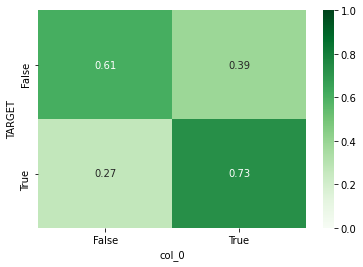

In [31]:
(pd.crosstab(index=y_test, columns=y_pred, normalize="index")
         .pipe((sns.heatmap, "data"), vmin=0, vmax=1, cmap="Greens", cbar=True,
               annot=True, square=False, fmt=".2f", ax=None)
         )

In [32]:
proba = pd.concat([pd.DataFrame(classifier.predict_proba(X.loc[:,X_resample.columns])).set_index(X.index),pd.DataFrame(y)],axis=1)
proba.head()

,0,1,TARGET
SK_ID_CURR,,,
100002,0.001718,0.998282,True
100031,0.001882,0.998118,True
100047,0.000457,0.999543,True
100049,0.000008,0.999992,True
100096,0.004446,0.995554,True


In [72]:
proba['proba_model'] = proba[0]<proba[1]
proba['match'] = proba['TARGET']==proba['proba_model']
proba = proba.sample(frac=1,)
proba

,0,1,TARGET,proba_model,match
SK_ID_CURR,,,,,
113796,0.575568,0.424432,False,False,True
160510,0.071575,0.928425,False,True,False
175654,0.025670,0.974330,False,True,False
158206,0.573948,0.426052,False,False,True
143513,0.650472,0.349528,False,False,True
...,...,...,...,...,...
375492,0.001770,0.998230,True,True,True
134359,0.998980,0.001020,False,False,True
159719,0.000029,0.999971,True,True,True


In [73]:
mask_index_dash_false = proba.loc[proba.match == True].loc[proba.TARGET == False].head(1500).index
mask_index_dash_true = proba.loc[proba.match == True].loc[proba.TARGET == True].head(1500).index
mask_index_dash =pd.concat([pd.DataFrame(mask_index_dash_false),pd.DataFrame(mask_index_dash_true)])
mask_index_dash.sample(frac=1)


,SK_ID_CURR
1026,371768
192,236344
578,149591
922,138234
822,179200
...,...
158,135712
985,136676
1339,208366
184,181530


In [39]:
joblib.dump(classifier, "model_final.pkl")

['model_final.pkl']

In [79]:
data_dash_1= data_dash_1.loc[mask_index_dash.SK_ID_CURR,:]
data_dash_1 = data_dash_1.sample(frac=1)
data_dash_1.to_csv('data_dash.csv',index_label='SK_ID_CURR')

from sklearn.metrics import accuracy_score,f1_score
y_pred = classifier.predict(X_test.loc[:,X_resample.columns])
print(fbeta_score(y_test,y_pred,beta=2,pos_label=True))
print(f1_score(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

Adaboost = 0.67 / 15 min d'execution

le meilleur résultat est avec adaboost pour un n_estimators de 200 , résultat de 0.92

from xgboost import plot_importance
plot_importance(classifier.named_steps['model_xgb'])
plt.show()

X_resample

grid_search.best_params_

# X_test_prep,y_test_prep = grid_search.fit_transform(X_test,y_test)
# y_pred = grid_search.predict(X_test_prep)
# print(classification_report(y_test, y_pred))

bestimator = grid_search.best_estimator_
y_pred = bestimator.predict(X_test)
test_score = grid_search.score(X_test, y_test)